In [6]:
repo_directory = '/Users/iaincarmichael/Dropbox/Research/law/law-net/'
data_dir = '/Users/iaincarmichael/Documents/courtlistener/'

import numpy as np
import sys
import matplotlib.pyplot as plt
from scipy.stats import rankdata
import cPickle as pickle
from collections import Counter


# graph package
import igraph as ig

# our code
sys.path.append(repo_directory + 'code/')
from setup_data_dir import setup_data_dir, make_subnetwork_directory
from pipeline.download_data import download_bulk_resource, download_master_edgelist, download_scdb
from helpful_functions import case_info

sys.path.append(repo_directory + 'vertex_metrics_experiment/code/')
from rankscore_experiment_sort import *
from rankscore_experiment_LR import *
from rankscore_experiment_match import *

from make_tr_edge_df import *


# which network to download data for
network_name = 'federal' # 'federal', 'ca1', etc


# some sub directories that get used
raw_dir = data_dir + 'raw/'
subnet_dir = data_dir + network_name + '/'
text_dir = subnet_dir + 'textfiles/'


# jupyter notebook settings
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
G = ig.Graph.Read_GraphML(subnet_dir + network_name +'_network.graphml')

# number of cases per year

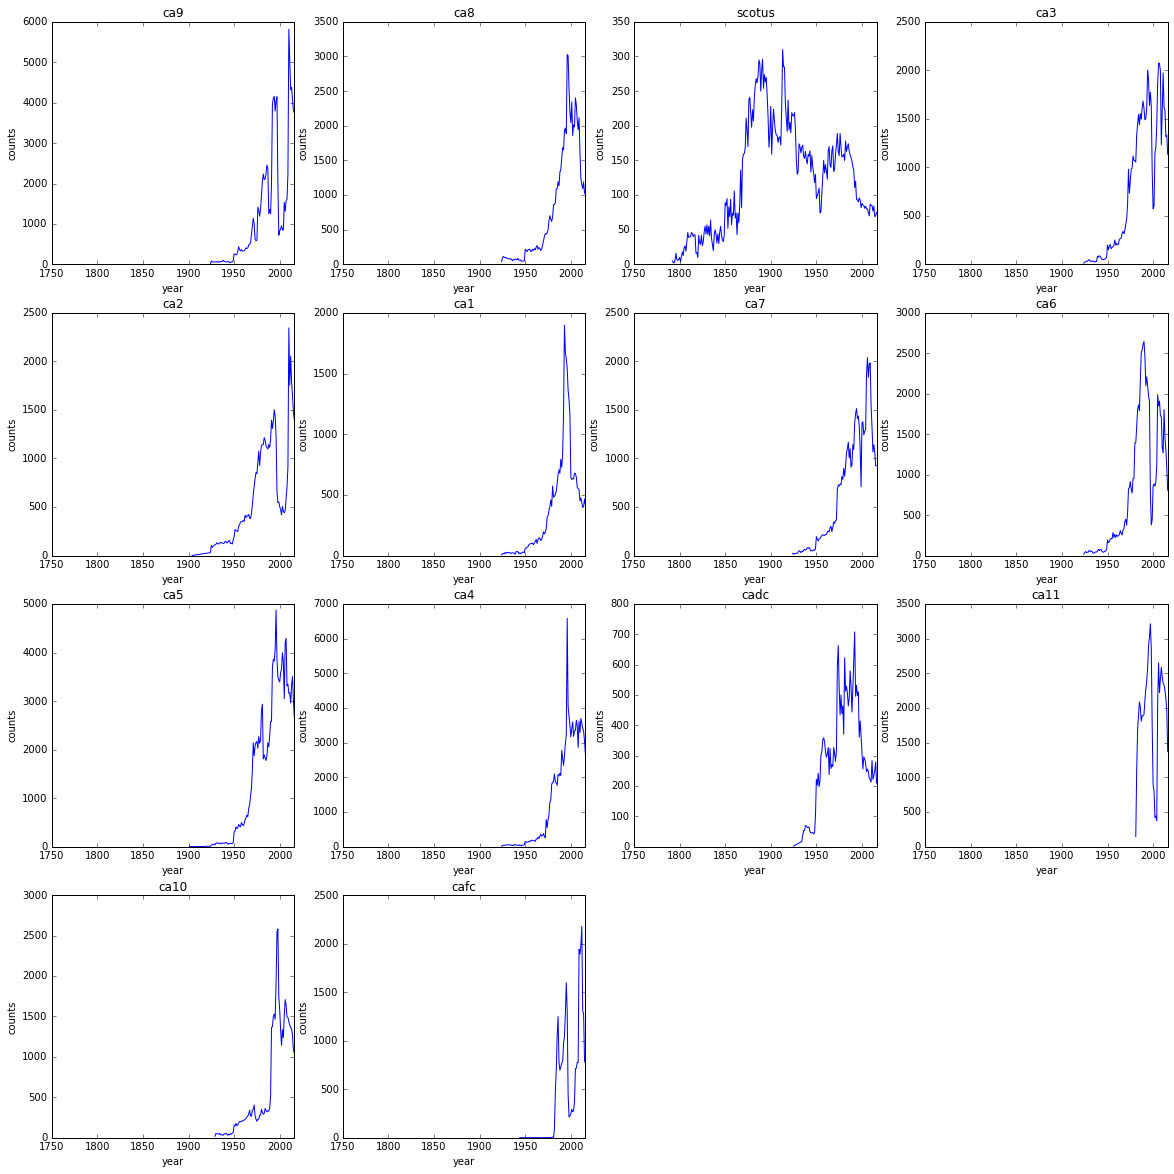

In [23]:
jurisdictions = set(G.vs['court'])

plt.figure(figsize=[20, 20])
k = 0
for court in jurisdictions:
    k += 1
    plt.subplot(4, 4, k)
    
    cases = G.vs.select(court_eq=court)

    year_counts = Counter(cases['year'])

    plt.plot(year_counts.keys(),
                year_counts.values())
    plt.xlabel('year')
    plt.xlim([1750, 2016])
    
    plt.ylabel('counts')
    plt.title(court)